
# Pression osmotique et propriétés de transport 
## ou comment prendre en compte les effets des interactions colloïdales dans les équations de transport de la matière ?
### Cours M2 Génie des Procédés Avancés

La présence d'interactions de surface entre colloïdes modifie les propriétés de transport. Ainsi, on peut démontrer que la diffusion collective (transport des colloïdes dans un gradient de concentration)  peut s'écrire : 
$$D=\frac{K(\phi)}{6\pi\mu a}V_p\frac{d\Pi}{d\phi}=D_0 K(\phi)\frac{V_p}{k_B T}\frac{d\Pi}{d\phi}$$
où $K(\phi)$ permet de prendre en compte l'effet de la fraction volumique, $\phi$, sur la mobilité d'une sphère en régime concentré et $\frac{d\Pi}{d\phi}$ permet de prendre en compte l'effet des interactions de surface. La variation de pression osmotique en fonction de la fraction volumique, $\Pi=f(\phi)$, represente l'équation d'état de la dispersion colloïdale et prend en compte l'effet des interactions colloïdales multi-corps.

Lorsque on utilise cette expression pour décrire un bilan de masse différentiel, il est possible de montrer qu'en régime stationnaire, le profil de concentration peut s'écrire en fonction de la pression osmotique :
- près d'une membrane fonctionnant en filtration tangentielle :
$$Pe=\frac{J\delta}{D_O}=\frac{V_p}{k_B T}\int_{\Pi_b}^{\Pi_m} \frac{K(\phi)}{\phi} \, \mathrm{d}\Pi=\int_{\phi_b}^{\phi_m} \frac{D(\phi)}{D_0} \, \frac{\mathrm{d}\phi}{\phi}$$
où $\delta$ est l'épaisseur de la couche limite induite par la vitesse tangentielle au dessus de la membrane
- lors d'un équilibre entre sédimentation et diffusion :
$$Pe=\frac{u_{sed}(r_1-r_2)}{D_O}=\frac{V_p}{k_B T}\int_{\Pi_1}^{\Pi_2} \frac{1}{\phi} \, \mathrm{d}\Pi$$
où les indices 1 et 2 représentent deux positions dans la hauteur du fluide qui sédimente

On peut noter qu'il est possible de retrouver les équations d'équilibre advection-diffusion classique pour le régime dilué 
$K(\phi)\rightarrow1$ et $\Pi \rightarrow \frac{k_B T \phi}{V_p}$

*Données* : On utilisera la loi suivante pour la pression osmotique présentant un écart à l'idéalité positive qui peut prendre en compte la présence de répulsion. 

$$\Pi = \frac{k_B T \phi}{V_p}+0.05 (\rho_p \phi)^2$$

Cette expression à l'avantage de pouvoir être intégrée analytiquement suivant :

$$\frac{V_p}{k_B T}\int_{\Pi_1}^{\Pi_2} \frac{1}{\phi} \, \mathrm{d}\Pi=\frac{V_p}{k_B T}\int_{\phi_1}^{\phi_2} \frac{1}{\phi}\frac{d\Pi}{d\phi} \, \mathrm{d}\phi=ln(\frac{\phi_2}{\phi_1})+\frac{V_p}{k_B T}2*0.01\rho_p^2 (\phi_2-\phi_1)$$


In [2]:
#Calcul des propriétés de la dispersion concentrée
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

#constant
kT= 1.38e-23*298.
#dispersion
a=20.e-9
mu=0.001
rho_p=1350 #kg m-3
vp=4*np.pi*(a**3)/3
D0=kT/(6*np.pi*mu*a)
viriel2=0.01


def K(phi):
    return (6.-9.*(abs(phi)**(1./3.))+9.*(abs(phi)**(5./3.))-6.*(abs(phi)**2.))/(6.+4.*(abs(phi)**(5./3.)))
def pi(phi):
    return kT*phi/vp+viriel2*((rho_p*phi)**2)

phi_a=np.logspace(-5,-1,100)
plt.loglog(phi_a,pi(phi_a), label='With interactions')
plt.loglog(phi_a,kT*phi_a/vp,'--', label='Van\'t Hoff')
plt.xlabel('phi')
plt.ylabel('Pi')
plt.title('Pression osmotique')
plt.legend(loc='best')
plt.show()
print ('En régime concentré, la pression osmotique prenant en compte les interactions s\'écarte de la loi de Van\'t Hoff (dispersions idéales) ')


D=D0*K(phi_a)*vp*derivative(pi, phi_a)/kT
plt.loglog(phi_a,D/D0, label='With interactions')
plt.loglog(phi_a,np.ones(100),'--', label='Van\'t Hoff')
plt.xlabel('phi')
plt.ylabel('D/D0')
plt.title('Diffusion collective (Stokes Einstein generalized law)')
plt.show()
print('Le coefficient de diffusion en régime dilué est', D0, 'm.s-2')
print ('En régime concentré, la diffusion devient plus importante : les répulsions entre colloïdes augmentent la diffusion (effet de ressorts comprimés entre colloïdes) ')


<Figure size 640x480 with 1 Axes>

En régime concentré, la pression osmotique prenant en compte les interactions s'écarte de la loi de Van't Hoff (dispersions idéales) 


<Figure size 640x480 with 1 Axes>

Le coefficient de diffusion en régime dilué est 1.0908479799518506e-11 m.s-2
En régime concentré, la diffusion devient plus importante : les répulsions entre colloïdes augmentent la diffusion (effet de ressorts comprimés entre colloïdes) 


La vitesse de sédimentation en régime diluée est : 3.0520000000000004e-10


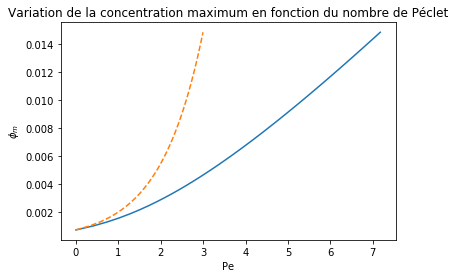

Pour un même Péclet (condition opératoire fixée), la concentration maximum sera plus grande en l absence de répulsions
Pour obtenir une même concentration maximum, le Péclet devra être plus important en présence de répulsions
En présence de répulsions, la dispersion résiste mieux à la sédimentation


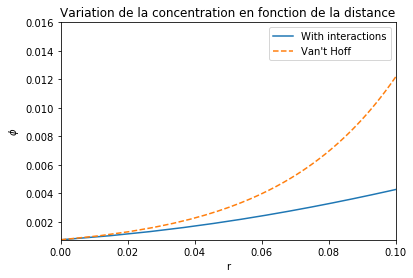

A la position r= 0.1 la fraction volumique est 0.004265965242888397 et la concentration 5.759053077899336  g/L


In [3]:
#Données
cb=1 #kg/m3
phi_b=cb/rho_p
pi_b=pi(phi_b)
rho_f=1000 #kg m-3
g=9.81 #m s-2
#Calcul de la vitesse de sédimentation en régime dilué
u_set=vp*(rho_p-rho_f)*g/(6*np.pi*mu*a)
print ('La vitesse de sédimentation en régime diluée est :', u_set)

phi_m=np.linspace(phi_b, 20*phi_b)

#fonction à intégrer pour obtenir le nombre de Péclet numériquement
def pe_set(phi):
    return vp*derivative(pi, phi)/(kT*phi)

#calcul du nombre de Péclet avec solutions analogiques
Pe_D0=np.log(phi_m/phi_b)
Pe=np.log(phi_m/phi_b)+2*viriel2*(rho_p**2)*(phi_m-phi_b)*vp/kT

#calcul par integration numérique
Pe_num=np.zeros(len(phi_m))
for i in range(len(phi_m)):
    Pe_num[i]=quad(pe_set,phi_b,phi_m[i])[0]

plt.plot(Pe,phi_m)
plt.plot(Pe_D0,phi_m,'--')
plt.xlabel('Pe')
plt.ylabel(r'$\phi_m$')
plt.title('Variation de la concentration maximum en fonction du nombre de Péclet')
plt.show()
print('Pour un même Péclet (condition opératoire fixée), la concentration maximum sera plus grande en l absence de répulsions')
print('Pour obtenir une même concentration maximum, le Péclet devra être plus important en présence de répulsions')
print('\033[1m'+'En présence de répulsions, la dispersion résiste mieux à la sédimentation')
#Tracé du profil de concentration en fonction de r=Pe D0 / u_set
plt.plot(Pe*D0/u_set,phi_m,label='With interactions')
plt.plot(Pe_D0*D0/u_set,phi_m,'--', label='Van\'t Hoff')
plt.ylabel(r'$\phi$')
plt.xlabel('r')
plt.xlim(0., 0.1)
plt.ylim(phi_b, 0.016)
plt.title('Variation de la concentration en fonction de la distance')
plt.legend(loc='best')
plt.show()

#calcul de la concentration pour une position donnée
r_s=0.1
Pe_s=r_s*u_set/D0

#fonction à résoudre pour déterminer phi à la membrane pour le Péclet Pe_s correspondant à la position r_s
def solve(phi):
    return np.log(phi/phi_b)+2*viriel2*(rho_p**2)*(phi-phi_b)*vp/kT - Pe_s

phim=fsolve(solve, x0=phi_b)[0]
print ('A la position r=',r_s,'la fraction volumique est', phim, 'et la concentration', phim*rho_p,' g/L')


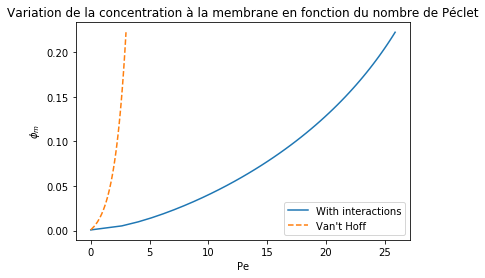

Pour un même Péclet (condition opératoire fixée), la concentration maximum sera plus grande en l absence de répulsions
En présence de répulsions, la dispersion résiste mieux à la compression induite par la force de traînée liée à la filtration : l accumlation est moins importante


In [4]:
#calcul pour la filtration
phi_m=np.linspace(phi_b, 300*phi_b)
#fonction à intégrer pour la filtration
def pe_filt(phi):
    return vp*derivative(pi, phi)*K(phi)/(kT*phi)

#calcul par integration numérique
Pe_fil=np.zeros(len(phi_m))
for i in range(len(phi_m)):
    Pe_fil[i]=quad(pe_filt,phi_b,phi_m[i])[0]

plt.plot(Pe_fil,phi_m,label='With interactions')
plt.plot(Pe_D0,phi_m,'--', label='Van\'t Hoff')
plt.xlabel('Pe')
plt.ylabel(r'$\phi_m$')
plt.title('Variation de la concentration à la membrane en fonction du nombre de Péclet')
plt.legend(loc='best')
plt.show()

print('Pour un même Péclet (condition opératoire fixée), la concentration maximum sera plus grande en l absence de répulsions')
print('\033[1m'+'En présence de répulsions, la dispersion résiste mieux à la compression induite par la force de traînée liée à la filtration : l accumlation est moins importante')


In [13]:
#SUITE EN CONSTRUCTION

#membrane
d_H=6e-3 #m
L=1.2 #m
#Dispersion
mu=0.001 #Pa.s
# conditions hydrodynamiques
u=[0.05, 0.1] #m/s
J=[1.e-6,2.e-6] #m/s

#Calcul de l'épaisseur de couche limite, du nombre de Péclet et de la concentration à la membrane
deltal=np.zeros(len(u))
Re=np.zeros(len(u))
Sh=np.zeros(len(u))
Pe=np.zeros(len(u)*len(J))
phi_mVH=np.zeros(len(u)*len(J))
phi_mint=np.zeros(len(u)*len(J))
Sc=mu/(rho_f*D0)
print ('Sc=',Sc)

#Function à résoudre, f_int=0, pour connaître phi m pour un Pe donné
def f_int(phi_m,Pe):
    return quad(pe_filt,phi_b,phi_m)[0]-Pe


for i in range(len(u)):
    Re[i]=rho_f*u[i]*d_H/mu
    if Re[i]<2100:
        Sh[i]=1.86*(Re[i]*Sc*d_H/L)**0.33
    else:
        Sh[i]=0.023*Re[i]**0.8*Sc**0.33
    deltal[i]=d_H/Sh[i]
    print ('L\'épaisseur de couche limite est de', round(deltal[i]*1e6, 1),'micromètres pour une vitesse tangentielle de ', u[i],'m/s' )
    for j in range(len(J)):
        Pe[i+len(u)*j]=J[j]*deltal[i]/D0
        phi_mVH[i+len(u)*j]=phi_b*np.exp(Pe[i+len(u)*j])
        phi_mint[i+len(u)*j]=fsolve(f_int, x0=phi_b,args=(Pe[i+len(u)*j]))[0]
print()  
print ('   J   \   u    |             ', round(u[0],3),'              ', round(u[1],3))
print ('------------------------------------------------------------------------------')
print ('  ', "%.2e"%J[0],'    |        Pe =   ', round(Pe[0],3), '         ', round(Pe[1],3))
print ('                |   phim VH =   ', round(phi_mVH[0],3), '        ', round(phi_mVH[1],3))
print ('                |   phim int=   ', round(phi_mint[0],3), '        ', round(phi_mint[1],3))
print ('------------------------------------------------------------------------------')
print ('  ', "%.2e"%J[1],'    |        Pe =   ', round(Pe[2],3), '       ', round(Pe[3],3))
print ('                |   phim VH =   ', round(phi_mVH[2],3), '      ', round(phi_mVH[3],3))
print ('                |   phim int=   ', round(phi_mint[2],3), '        ', round(phi_mint[3],3))


Sc= 91671.80197227294
L'épaisseur de couche limite est de 65.0 micromètres pour une vitesse tangentielle de  0.05 m/s
L'épaisseur de couche limite est de 51.7 micromètres pour une vitesse tangentielle de  0.1 m/s

   J   \   u    |              0.05                0.1
------------------------------------------------------------------------------
   1.00e-06     |        Pe =    5.96           4.741
                |   phim VH =    0.287          0.085
                |   phim int=    0.018          0.013
------------------------------------------------------------------------------
   2.00e-06     |        Pe =    11.919         9.482
                |   phim VH =    111.229        9.723
                |   phim int=    0.053          0.037
